# Text mining: Analyse 1 jaarverslag
Use the kernel `tmj` which I've made in the virtual environment `tmj`. This environment holds all the needed packages and so I can manage them without interfering with the system Python installation or other Python projects.

In [1]:
# Generic imports
import matplotlib.pyplot as plt
from os.path import join
from os import makedirs
import pandas as pd
import re

## Pdf to text

In [2]:
# Setup
filename = 'AEGON_2017.pdf'
folder = './jaarverslagen'
language = 'english'

In [3]:
# Parameters
filename = "Unilever_2017.pdf"
folder = "./jaarverslagen"
language = "english"


In [4]:
# Setup output folder
filename_no_extension = re.search('(.*)\.pdf', filename).group(1)
output_folder = join('output', filename_no_extension)
makedirs(output_folder, exist_ok=True)

In [5]:
# Extract text (as bytes) from pdf
import textract
text = textract.process(join(folder, filename))
print(text.hex()[:100], '...')

# Textract encodes as UTF-8, so decode back to text before proceding
text = text.decode('utf-8')

444953434c41494d45520a546869732069732061205044462076657273696f6e206f662074686520556e696c657665722041 ...


In [6]:
# Maybe decompose to get rid of the accents? Nah

## Bag of words

In [7]:
# Tokenize with the Natural Language Toolkit (nltk)
from nltk import word_tokenize
words = word_tokenize(text)
print(words[:100])

['DISCLAIMER', 'This', 'is', 'a', 'PDF', 'version', 'of', 'the', 'Unilever', 'Annual', 'Report', 'and', 'Accounts', '2017', 'and', 'is', 'an', 'exact', 'copy', 'of', 'the', 'printed', 'document', 'provided', 'to', 'Unilever', '’', 's', 'shareholders', '.', 'Certain', 'sections', 'of', 'the', 'Unilever', 'Annual', 'Report', 'and', 'Accounts', '2017', 'have', 'been', 'audited', '.', 'These', 'are', 'on', 'pages', '86', 'to', '155', ',', 'and', 'those', 'parts', 'noted', 'as', 'audited', 'within', 'the', 'Directors', '’', 'Remuneration', 'Report', 'on', 'pages', '47', 'to', '76', '.', 'The', 'maintenance', 'and', 'integrity', 'of', 'the', 'Unilever', 'website', 'is', 'the', 'responsibility', 'of', 'the', 'Directors', ';', 'the', 'work', 'carried', 'out', 'by', 'the', 'auditors', 'does', 'not', 'involve', 'consideration', 'of', 'these', 'matters', '.']


In [8]:
# Initialize the word cloud
from wordcloud import WordCloud
wc = WordCloud(
    font_path='/usr/share/fonts/gsfonts/NimbusSansNarrow-Bold.otf',\
    max_words=100,\
    background_color='white',\
    colormap='Oranges',\
    margin=10
)

def generateWordCloud(series):
    # To uppercase
    #FREQUENCIES = {k.upper(): v for k, v in frequencies.items()}
    SERIES = series.copy()
    SERIES.index = SERIES.index.str.upper()

    # Create the word cloud
    wordcloud = wc.generate_from_frequencies(SERIES)
    
    # Show it
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    # Return the word cloud to maybe save it
    return wordcloud

More about the word cloud: http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [9]:
# Run this after each text mining step
def countAndSave(words, suffix):
    # Count as bag of words and store as a pandas Series
    ser = pd.Series(words).value_counts()
    print(ser.head(10))

    # Save a CSV with the frequencies
    ser.to_csv(join(output_folder, filename_no_extension + suffix + '.csv'))

    # Create, show and save a word cloud
    wordcloud = generateWordCloud(ser)
    wordcloud.to_file(join(output_folder, filename_no_extension + suffix + '.png'));

the    5804
,      4666
.      4312
of     4295
and    4279
(      3677
)      3674
...    3101
to     2719
in     2393
dtype: int64


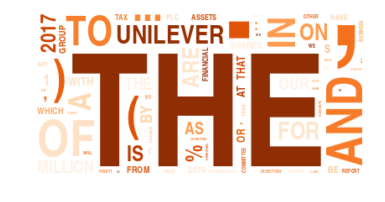

In [10]:
# Let's see
countAndSave(words, '_bag_of_words')

## Do some basic processing
* Ignore punctuation
* Ignore case
* Remove stopwords

In [11]:
# Convert all to lowercase
words = [w.lower() for w in words]

# Remove punctuation
words = [re.sub('[^A-Za-z0-9]', '', w) for w in words]
words = list(filter(None, words))

# Remove stopwords
from nltk.corpus import stopwords
words = [w for w in words if w not in stopwords.words(language)]

unilever     1498
2017          949
million       883
1             842
financial     618
group         602
shares        602
2016          526
nv            452
report        449
dtype: int64


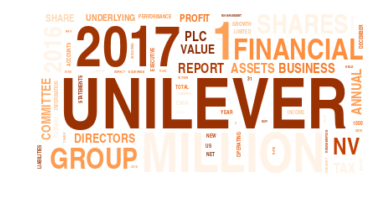

In [12]:
# Let's go!
countAndSave(words, '_basic_processing')